In [1]:
#Exploratory Data Analytics 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

# pandas - data handling
# matplotlib , seaborn - visualization 
# visualization = insights , not decoration 


In [3]:
#load cleaned data 
PROJECT_ROOT = r"C:\Users\CORE\Desktop\customer_segmentation"
DATA_DIR = os.path.join(PROJECT_ROOT, "data")

for file in os.listdir(DATA_DIR):
    if file.lower().endswith(".csv"):
        df = pd.read_csv(os.path.join(DATA_DIR, file), encoding="ISO-8859-1")
        break
    elif file.lower().endswith((".xls", ".xlsx")):
        df = pd.read_excel(os.path.join(DATA_DIR, file))
        break


In [4]:
df.head()
df.shape


(541909, 8)

In [6]:
# how do we measure money spent ?
# right now we dont have revenue , so must create it 

df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df

# quantity and price alone are meaningless , revenue = true customer value , it can be used in EDA , feature engineering , clustering 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.00,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.00,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.00,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.00,France,16.60


In [7]:
df["Revenue"].describe()


count    541909.00
mean         17.99
std         378.81
min     -168469.60
25%           3.40
50%           9.75
75%          17.40
max      168469.60
Name: Revenue, dtype: float64

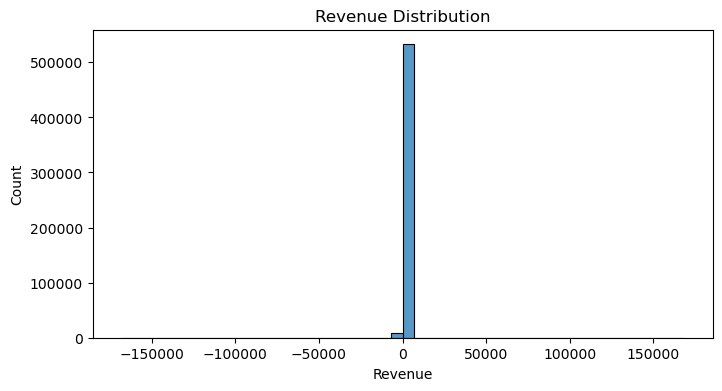

In [8]:
#visualize revenue distribution 
plt.figure(figsize=(8, 4))
sns.histplot(df["Revenue"], bins=50)
plt.title("Revenue Distribution")
plt.show()

#data is transactional level

In [9]:
#TOTAL REVENUE PER CUSTOMER

customer_revenue = (
    df.groupby("CustomerID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

customer_revenue.head(10)

#Top 5–10 customers contribute huge revenue

#This is Pareto principle (80/20 rule) in action

CustomerID
14646.00   279489.02
18102.00   256438.49
17450.00   187482.17
14911.00   132572.62
12415.00   123725.45
14156.00   113384.14
17511.00    88125.38
16684.00    65892.08
13694.00    62653.10
15311.00    59419.34
Name: Revenue, dtype: float64

In [12]:
#NUMBER OF PURCHASES PER CUSTOMER

customer_frequency = (
    df.groupby("CustomerID")["InvoiceNo"]
    .nunique()
)

customer_frequency

#Why nunique()? - One invoice can have many products , Frequency = number of invoices, not rows

CustomerID
12346.00     2
12347.00     7
12348.00     4
12349.00     1
12350.00     1
            ..
18280.00     1
18281.00     1
18282.00     3
18283.00    16
18287.00     3
Name: InvoiceNo, Length: 4372, dtype: int64

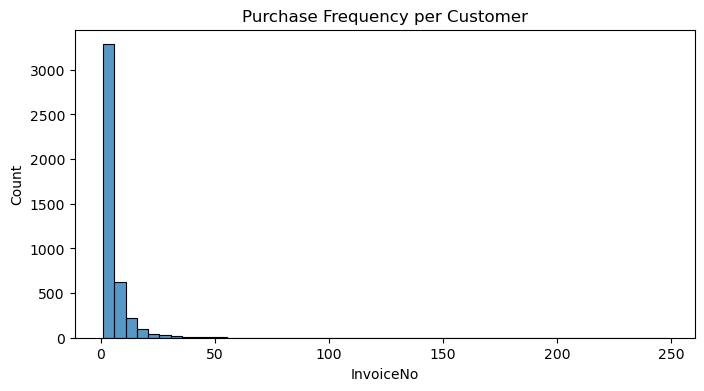

In [13]:
#DISTRIBUTION OF CUSTOMER FREQUENCY

plt.figure(figsize=(8, 4))
sns.histplot(customer_frequency, bins=50)
plt.title("Purchase Frequency per Customer")
plt.show()


#most customers buy only once or twice , few customers buy repeadtly , loyalty varies significally 

In [14]:
#COUNTRY-LEVEL ANALYSIS

df["Country"].value_counts().head(10) # we can see that UK dominates 


Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64

In [15]:
#REVENUE BY COUNTRY

country_revenue = (
    df.groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

country_revenue.head(10)

# UK = major revenue contributor
# Other countries = niche segments

Country
United Kingdom   8187806.36
Netherlands       284661.54
EIRE              263276.82
Germany           221698.21
France            197403.90
Australia         137077.27
Switzerland        56385.35
Spain              54774.58
Belgium            40910.96
Sweden             36595.91
Name: Revenue, dtype: float64

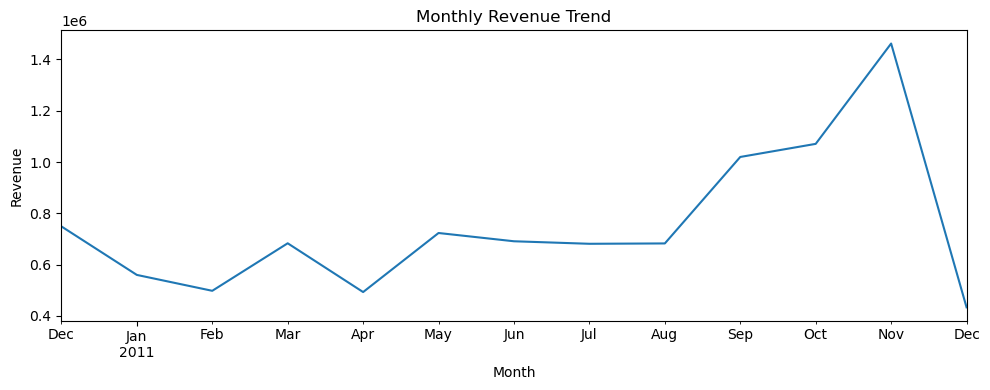

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Ensure InvoiceDate is datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# 2️⃣ (Safety) Drop rows where InvoiceDate is missing
df = df.dropna(subset=["InvoiceDate"])

# 3️⃣ Create Revenue column if not already created
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# 4️⃣ Create Month column
df["Month"] = df["InvoiceDate"].dt.to_period("M")

# 5️⃣ Monthly revenue aggregation
monthly_revenue = df.groupby("Month")["Revenue"].sum()

# 6️⃣ Plot monthly revenue trend
plt.figure(figsize=(10, 4))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
